In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
np.random.seed(1)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

### Statement of the problem:

CoverMyMeds Challenge Problem
At CoverMyMeds, time series analysis forms the backbone of the financial projections we make at the beginning of each fiscal year and helps us set realistic but challenging company goals.  Many of our products have multiple customers whose behaviors might (or might not) influence each other.  We are presenting daily volume (can be thought of as purchases) of one product for three customers. Questions that you should answer in this project are the following: 
* What trends are in the data at the daily, monthly, and yearly levels?
* What variables do and do not affect daily volume?
* How does the behavior of one customer affect the behavior of the other customers?
* How accurately can you predict what will happen in 2019 at the monthly and yearly levels?
* How accurate are your projections 1 month, 3 months, and 6 months after the  day they were forecasted from?


In [49]:
# needs to install pyarrow
df = pd.read_parquet('data/cmm_erdos_bootcamp_2020_timeseries.pq', engine='auto')
df.shape

(1095, 11)

Very small data size

In [50]:
df.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


Check if there's missing value

In [51]:
df.isna().sum()

date_val          0
calendar_year     0
calendar_month    0
calendar_day      0
day_of_week       0
is_weekday        0
is_workday        0
is_holiday        0
volume_A          0
volume_B          0
volume_C          0
dtype: int64

Convert 1sf column to datetime type

In [52]:
df['date_val'] = pd.to_datetime(df['date_val'], yearfirst=True)
df.set_index(['date_val'], inplace = True)

In [51]:
df.groupby('day_of_week')[['volume_A', 'volume_B', 'volume_B']].sum()

,volume_A,volume_B,volume_B
day_of_week,,,
1,413986,208444,208444
2,1092006,549367,549367
3,1245816,627366,627366
4,1223027,624308,624308
5,1239377,621993,621993
6,1168602,591537,591537
7,416054,209529,209529


In [52]:
df.groupby('is_weekday')[['volume_A', 'volume_B', 'volume_B']].sum()

,volume_A,volume_B,volume_B
is_weekday,,,
0,830040,417973,417973
1,5968828,3014571,3014571


In [53]:
df.groupby('is_holiday')[['volume_A', 'volume_B', 'volume_B']].sum()

,volume_A,volume_B,volume_B
is_holiday,,,
0,6741032,3405139,3405139
1,57836,27405,27405


In [26]:
df[['volume_A','volume_B', 'volume_C']].describe()

,volume_A,volume_B,volume_C
count,1095.000000,1095.000000,1095.000000
mean,6209.011872,3134.743379,2950.600913
std,2546.338435,1232.288150,1157.136368
min,974.000000,701.000000,574.000000
25%,3082.000000,1471.000000,1426.000000
50%,7000.000000,3646.000000,3408.000000
75%,8353.000000,4046.000000,3846.000000
max,10474.000000,5152.000000,4963.000000


In [53]:
df_new = df.drop(columns = ['calendar_year', 'calendar_month', 'calendar_day'])

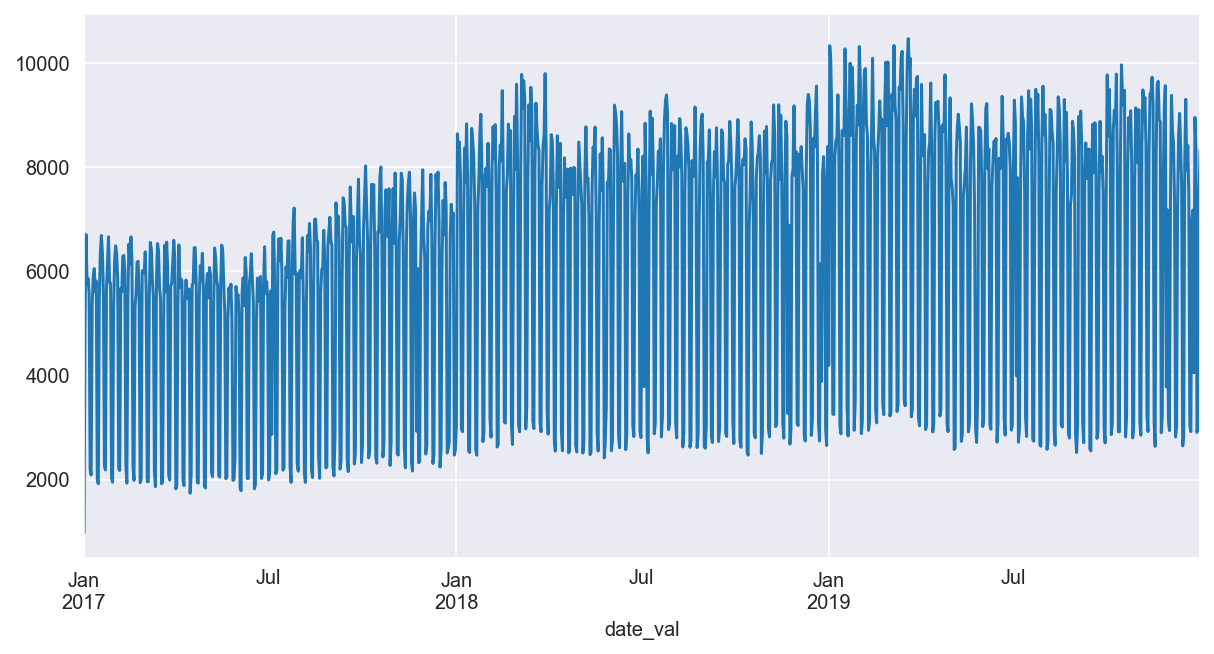

In [59]:
df_new['volume_A'].plot(figsize=(10, 5))
plt.show()

In [61]:
test_a = df_new['volume_A'].to_numpy()

In [64]:
# Import the SimpleExpSmoothing object
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(df_new['volume_A'])

/Users/emp/anaconda3/envs/ml/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [66]:
fit = ses.fit(smoothing_level=0.5, optimized=False)

In [70]:
df_new.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date_val', length=1095, freq=None)

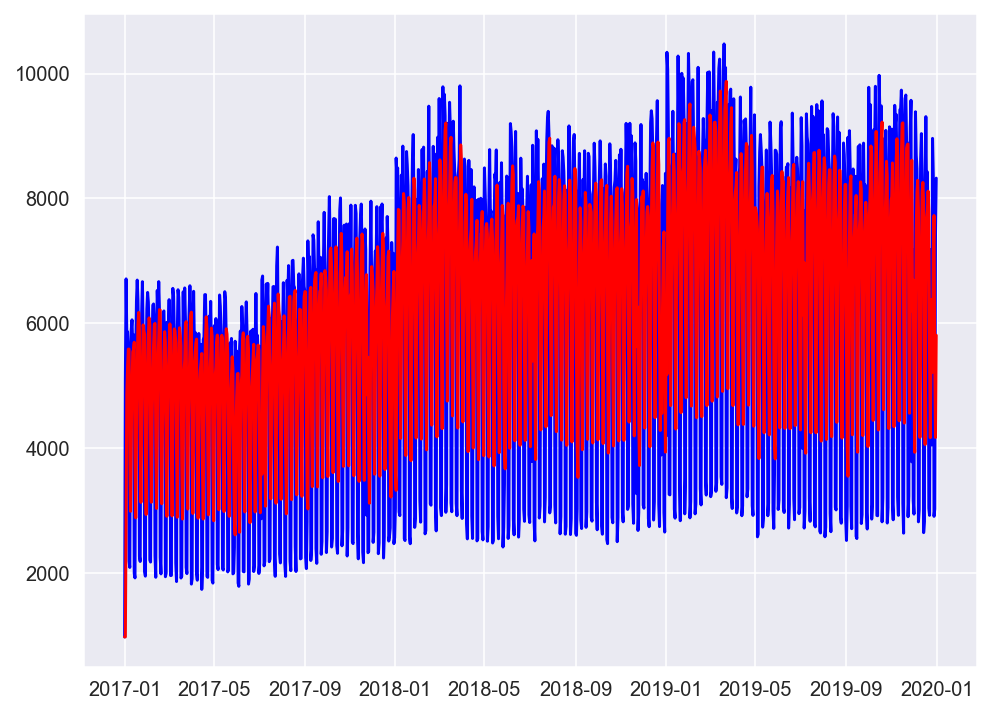

In [71]:
plt.figure(figsize=(8,6))

# plot the training data
plt.plot(df_new.index, df_new['volume_A'],'b',
            label = "Training Data")

# plot the fit
plt.plot(df_new.index, fit.fittedvalues,'r-',
            label = "Fitted Values")

In [ ]:
EMA = 0.0
gamma = 0.1
for ti in range(11000):
    EMA = gamma*test_a[ti] + (1-gamma)*EMA
    test_a[ti] = EMA

In [42]:
x1 = np.linspace(0.1, 9.9, 20)
x2 = np.linspace(0.3, 10, 20)
# y = f([x1, x2])
y = x1 * x2
noise = np.random.normal(0, 1, size=(len(y)))
y += noise